In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from sklearn.metrics import r2_score, auc
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train_test_model(reg, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)   # Make prediction on the training data
    y_test_pred = reg.predict(X_test)  # Make predictions on test data
    return y_train_pred, y_test_pred

# Numerical Analysis on the RMSE, R^2 and return the plot of y_true versus y_predicted
def anaylsisplt( X_test, y_train, y_train_pred, y_test, y_test_pred):
    rms1 = sqrt(mean_squared_error(y_train, y_train_pred))
    rms1 = round(rms1,5)
    rms2 = sqrt(mean_squared_error(y_test, y_test_pred))
    rms2 = round(rms2, 5)
    print('Returns the coefficient of determination R^2 of the prediction is {0:.3f}.'.format(reg.score(X_test, y_test)))
    fig = plt.figure()
    axx1 = fig.add_subplot(111)
    axx1.scatter(y_train, y_train_pred, s=1, c='b', marker="s")
    axx1.scatter(y_test, y_test_pred, s=10, c='r', marker="s")
    z = np.polyfit(y_test, y_test_pred, 1)
    plt.text(-3.5, -0.5, 'Train RMSE = %s\n Test RMSE = %s\n' % (rms1, rms2))
    p = np.poly1d(z)
    axx1.plot(y_test, p(y_test), "k--")
    plt.show()

# Data Transformation to normal distribution


 mu = 2.82 and sigma = 1.70



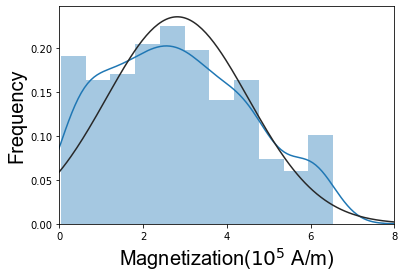

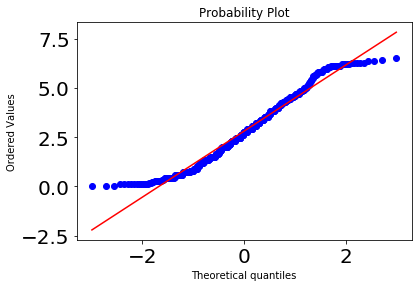

In [3]:
df = pd.read_csv('Results_8.csv')
df['Mag'] = df['Mag']/100000
sns.distplot(df['Mag'], fit= norm, norm_hist= True)

(mu, sigma) = norm.fit(df['Mag'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
axis_font = {'fontname':'Arial', 'size':'20'}
#Now plot the distribution
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            #loc='best')
plt.ylabel('Frequency', **axis_font)
#plt.title('Magnetization(A/m)')
plt.xlabel('Magnetization($10^{5}$ A/m)', **axis_font)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlim(0, 8)
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Mag'], plot=plt)
plt.show()


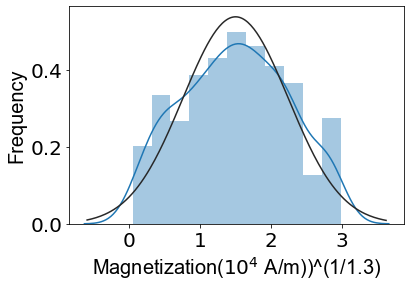

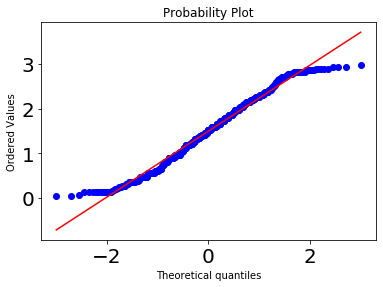

In [4]:
from sklearn.preprocessing import power_transform
df = pd.read_csv('Results_8.csv')
df['Mag'] = np.power(df['Mag'], 1/1.3)/10000

#Check the new distribution 
sns.distplot(df['Mag'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Mag'])
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
axis_font = {'fontname':'Arial', 'size':'20'}
#Now plot the distribution
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            #loc='best')
plt.ylabel('Frequency', **axis_font)
plt.xlabel('Magnetization($10^{4}$ A/m))^(1/1.3)', **axis_font)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
#plt.title('(Magnetization(A/m))^(1/1.3)')
#plt.xlim(0, 800)
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Mag'], plot=plt)
plt.show()

# Pearson Correlation_linear correlation

In [5]:
#correlation matrix
corrmat = df.corr(method = 'pearson')
print(corrmat.head(1))

     Mag    nega_1    nega_2   nega_3    nega_4    nega_5    nega_6    nega_7  \
Mag  1.0 -0.229546 -0.046064  0.03757 -0.028135 -0.040718 -0.002289  0.027361   

       nega_8     aff_1  ...     LCx_7     LCx_8     LCz_1     LCz_2  \
Mag  0.023255  0.143786  ...  0.320422  0.228131 -0.173247  0.110259   

        LCz_3    LCz_4     LCz_5     LCz_6     LCz_7     LCz_8  
Mag  0.248804  0.19987  0.196436  0.217039  0.224383  0.134875  

[1 rows x 177 columns]


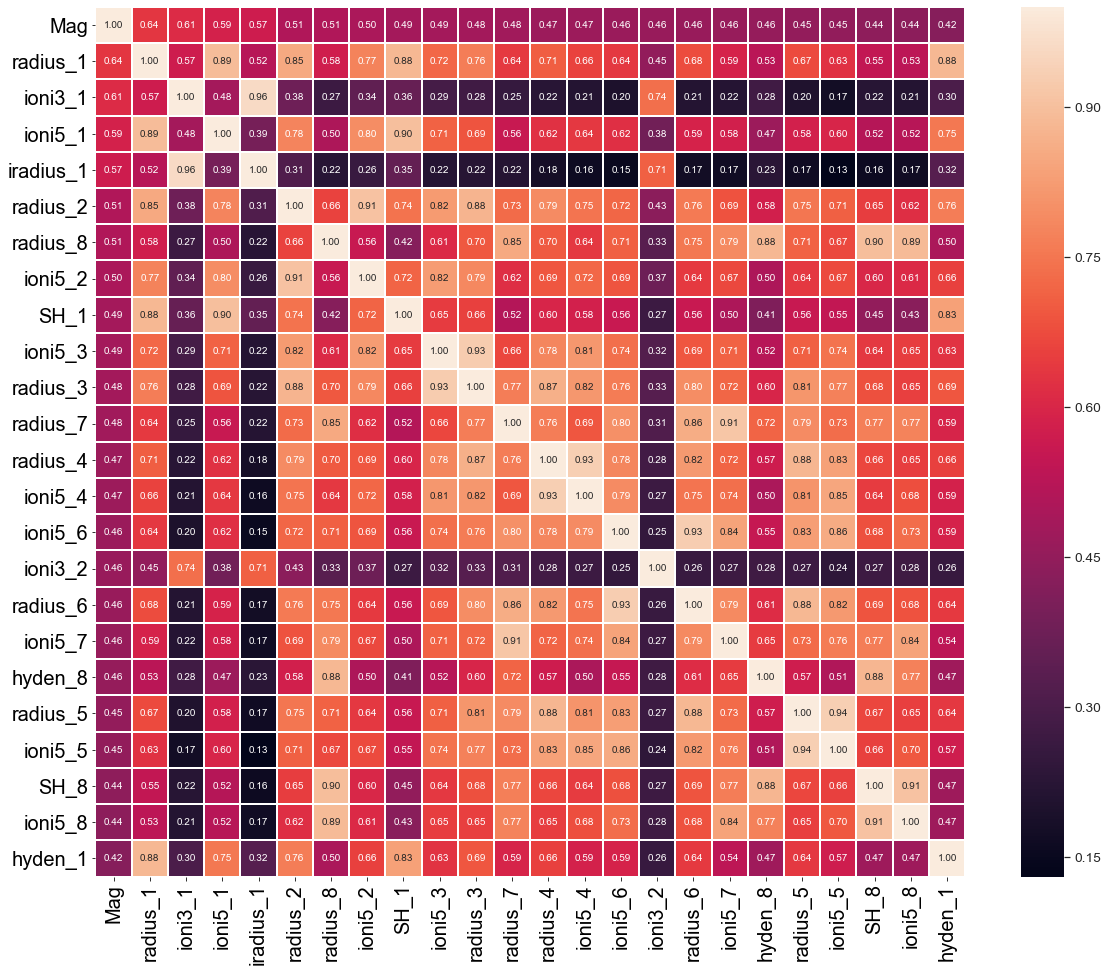

In [6]:
k = 24 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Mag')['Mag'].index
#print(cols)
cm = np.corrcoef(df[cols].values.T)
#print(cm)
f, ax = plt.subplots(figsize=(20, 16))
ax.set_ylim(len(cm)-0.1, -0.1)
ax.set_xlim(len(cm)-0.1, -0.1)
sns.set(font_scale=1.25)

sns.heatmap(cm, annot=True, fmt='.2f', ax=ax,linewidth = 1,annot_kws={'size': 10},square = True,cbar=True,yticklabels=cols.values,xticklabels=cols.values)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True,linewidths = 1, fmt='.2f', annot_kws={'size': 12},yticklabels=cols.values, xticklabels=cols.values)
# label_y = ax.get_yticklabels()
# plt.setp(label_y, rotation=360, horizontalalignment='right')
# label_x = ax.get_xticklabels()
# plt.setp(label_x, rotation=360, horizontalalignment='right')
# #plt.title("slot")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.savefig('Corr.png')
plt.show()

No handles with labels found to put in legend.


['radius_1' 'ioni3_1' 'ioni5_1' 'iradius_1' 'radius_2' 'radius_8'
 'ioni5_2' 'SH_1' 'ioni5_3' 'radius_3' 'radius_7' 'radius_4' 'ioni5_4'
 'ioni5_6' 'ioni3_2' 'radius_6' 'ioni5_7' 'hyden_8' 'radius_5' 'ioni5_5'
 'SH_8' 'ioni5_8' 'hyden_1']


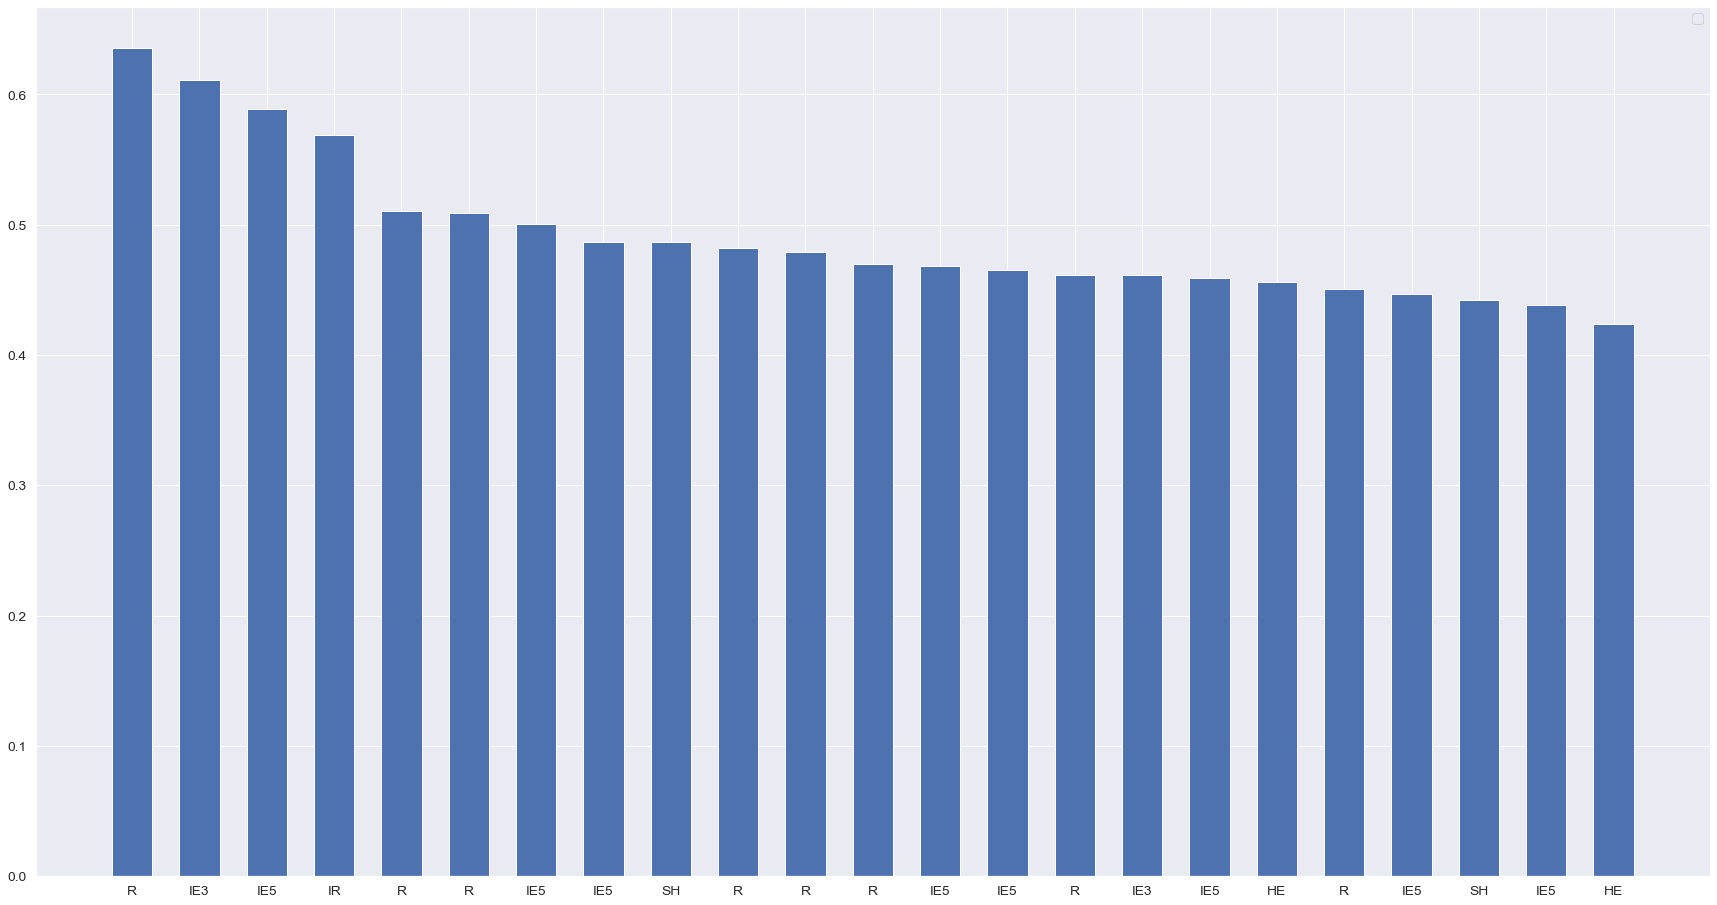

In [7]:
import matplotlib
f, ax = plt.subplots(figsize=(30, 16))
a = cm[0]
b = np.delete(a,0)
c =np.delete(cols.values,0)
print(c)
c = ['R','IE3', 'IE5', 'IR', 'R' ,'R',
 'IE5', 'IE5', 'SH' ,'R', 'R', 'R' ,'IE5',
 'IE5', 'R', 'IE3' ,'IE5' ,'HE' ,'R', 'IE5',
 'SH', 'IE5', 'HE']
x = np.arange(len(c))
width =0.6
rects1 = ax.bar(x, b, width)
ax.set_xticks(x)
ax.set_xticklabels(c)
ax.legend()

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=50) 
plt.show()
#p1 = plt.bar(c, b)

# Full Feature set 

In [31]:
from sklearn.preprocessing import power_transform
df = pd.read_csv('Results_8.csv')
df['Mag'] = np.power(df['Mag'], 1/1.3)

selected_features = [
                      u'nega_1', u'nega_2', u'nega_3',  u'nega_4', u'nega_5', u'nega_6',u'nega_7',u'nega_8',
                      u'aff_1', u'aff_2', u'aff_3',   u'aff_4',  u'aff_5',  u'aff_6', u'aff_7', u'aff_8',
                     u'val_1',  u'val_2',  u'val_3', u'val_4', u'val_5',  u'val_6', u'val_7', u'val_8', 
                     u'ioni1_1', u'ioni1_2',   u'ioni1_3', u'ioni1_4',  u'ioni1_5', u'ioni1_6',u'ioni1_7',u'ioni1_8', 
                      u'ioni2_1', u'ioni2_2',  u'ioni2_3', u'ioni2_4',  u'ioni2_5', u'ioni2_6',u'ioni2_7',u'ioni2_8' , 
                      u'radius_1', u'radius_2',   u'radius_3', u'radius_4',  u'radius_5', u'radius_6',u'radius_7',u'radius_8',
                     u'redox_1', u'redox_2', u'redox_3', u'redox_4',  u'redox_5', u'redox_6',u'redox_7',u'redox_8',
                     u'TC_1',u'TC_2', u'TC_3', u'TC_4',  u'TC_5', u'TC_6',u'TC_7',u'TC_8',
                     u'HF_1',u'HF_2', u'HF_3', u'HF_4',  u'HF_5', u'HF_6',u'HF_7',u'HF_8',
                     u'resis_1',u'resis_2', u'resis_3', u'resis_4',  u'resis_5', u'resis_6',u'resis_7',u'resis_8', 
                     u'iradius_1',u'iradius_2', u'iradius_3', u'iradius_4',  u'iradius_5', u'iradius_6',u'iradius_7',u'iradius_8', 
                    u'oxir_1',u'oxir_2', u'oxir_3', u'oxir_4',  u'oxir_5', u'oxir_6',u'oxir_7',u'oxir_8',
                     u'hyden_1',u'hyden_2', u'hyden_3', u'hyden_4',  u'hyden_5', u'hyden_6',u'hyden_7',u'hyden_8',
                    u'ioni3_1',u'ioni3_2', u'ioni3_3', u'ioni3_4',  u'ioni3_5', u'ioni3_6',u'ioni3_7',u'ioni3_8',
                      u'ioni4_1',u'ioni4_2', u'ioni4_3', u'ioni4_4', u'ioni4_5', u'ioni4_6',u'ioni4_7',u'ioni4_8',
                       u'ioni5_1',u'ioni5_2', u'ioni5_3', u'ioni5_4',  u'ioni5_5', u'ioni5_6',u'ioni5_7',u'ioni5_8',
                    u'EC_1',u'EC_2', u'EC_3', u'EC_4',  u'EC_5', u'EC_6',u'EC_7',u'EC_8', 
                     u'NC_1',u'NC_2', u'NC_3', u'NC_4',  u'NC_5', u'NC_6',u'NC_7',u'NC_8',
                     u'NM_1',u'NM_2', u'NM_3', u'NM_4',  u'NM_5', u'NM_6',u'NM_7',u'NM_8', 
                    u'SH_1',u'SH_2', u'SH_3', u'SH_4',  u'SH_5', u'SH_6',u'SH_7',u'SH_8',
                 u'LCx_1',u'LCx_2', u'LCx_3', u'LCx_4',  u'LCx_5', u'LCx_6',u'LCx_7',u'LCx_8',
                     u'LCz_1',u'LCz_2', u'LCz_3', u'LCz_4',  u'LCz_5', u'LCz_6',u'LCz_7',u'LCz_8'
]

# selected_features = [
#                       u'nega_1', u'nega_2', u'nega_3',  u'nega_4', u'nega_5', u'nega_6',u'nega_7',u'nega_8',
# #                       u'aff_1', u'aff_2', u'aff_3',   u'aff_4',  u'aff_5',  u'aff_6', u'aff_7', u'aff_8',
# #                      u'val_1',  u'val_2',  u'val_3', u'val_4', u'val_5',  u'val_6', u'val_7', u'val_8', 
#                      u'ioni1_1', u'ioni1_2',   u'ioni1_3', u'ioni1_4',  u'ioni1_5', u'ioni1_6',u'ioni1_7',u'ioni1_8', 
#                       u'ioni2_1', u'ioni2_2',  u'ioni2_3', u'ioni2_4',  u'ioni2_5', u'ioni2_6',u'ioni2_7',u'ioni2_8' , 
#                       u'radius_1', u'radius_2',   u'radius_3', u'radius_4',  u'radius_5', u'radius_6',u'radius_7',u'radius_8',
# #                      u'redox_1', u'redox_2', u'redox_3', u'redox_4',  u'redox_5', u'redox_6',u'redox_7',u'redox_8',
# #                      u'TC_1',u'TC_2', u'TC_3', u'TC_4',  u'TC_5', u'TC_6',u'TC_7',u'TC_8',
# #                      u'HF_1',u'HF_2', u'HF_3', u'HF_4',  u'HF_5', u'HF_6',u'HF_7',u'HF_8',
#                      u'resis_1',u'resis_2', u'resis_3', u'resis_4',  u'resis_5', u'resis_6',u'resis_7',u'resis_8', 
#                      u'iradius_1',u'iradius_2', u'iradius_3', u'iradius_4',  u'iradius_5', u'iradius_6',u'iradius_7',u'iradius_8', 
# #                     u'oxir_1',u'oxir_2', u'oxir_3', u'oxir_4',  u'oxir_5', u'oxir_6',u'oxir_7',u'oxir_8',
# #                      u'hyden_1',u'hyden_2', u'hyden_3', u'hyden_4',  u'hyden_5', u'hyden_6',u'hyden_7',u'hyden_8',
# #                     u'ioni3_1',u'ioni3_2', u'ioni3_3', u'ioni3_4',  u'ioni3_5', u'ioni3_6',u'ioni3_7',u'ioni3_8',
# #                       u'ioni4_1',u'ioni4_2', u'ioni4_3', u'ioni4_4', u'ioni4_5', u'ioni4_6',u'ioni4_7',u'ioni4_8',
#                        u'ioni5_1',u'ioni5_2', u'ioni5_3', u'ioni5_4',  u'ioni5_5', u'ioni5_6',u'ioni5_7',u'ioni5_8',
# #                     u'EC_1',u'EC_2', u'EC_3', u'EC_4',  u'EC_5', u'EC_6',u'EC_7',u'EC_8', 
#                      u'NC_1',u'NC_2', u'NC_3', u'NC_4',  u'NC_5', u'NC_6',u'NC_7',u'NC_8',
# #                      u'NM_1',u'NM_2', u'NM_3', u'NM_4',  u'NM_5', u'NM_6',u'NM_7',u'NM_8', 
# #                     u'SH_1',u'SH_2', u'SH_3', u'SH_4',  u'SH_5', u'SH_6',u'SH_7',u'SH_8',
# #                  u'LCx_1',u'LCx_2', u'LCx_3', u'LCx_4',  u'LCx_5', u'LCx_6',u'LCx_7',u'LCx_8',
#                      u'LCz_1',u'LCz_2', u'LCz_3', u'LCz_4',  u'LCz_5', u'LCz_6',u'LCz_7',u'LCz_8'
# ]


In [32]:
target = u'Mag'
# In[13]:
X = df[selected_features].values
y = df[target].values
print(X.shape)

(505, 176)


In [33]:
#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(X)
#X= preprocessing.scale(X)
#print(X[500:508])
#X_fake = min_max_scaler.fit_transform(X_fake)
#X = preprocessing.normalize(X, norm='l2')
#print(X[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature selection

# Removing features with low variance

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.feature_selection import VarianceThreshold

# sel=VarianceThreshold(threshold=(0.8*(1-0.8)))#Removing features with low variance
# sel.fit_transform(X)#返回的结果为选择的特征矩阵
 
# print(sel.fit_transform(X))#
# print(len(X[0]))

# Random Forest Regressor Method

In [35]:
from sklearn.feature_selection import SelectFromModel
# Random forest feature importance
# rf_reg = RandomForestRegressor()
# rf_reg.fit(X_train, y_train)
# for feature in zip(selected_features, rf_reg.feature_importances_):
#    #print(rf_reg.feature_importances_)
#    sfm = SelectFromModel(rf_reg, threshold=0.0028)
#    sfm.fit(X_train, y_train)
#    #print(rf_reg.feature_importances_)
# for feature_list_index in sfm.get_support(indices=True):
#    print(selected_features[feature_list_index])
# X_train = sfm.transform(X_train)
# X_test = sfm.transform(X_test)

# recursive feature elimination
# estimator = xgb.XGBRegressor()
# selector = RFECV(estimator, step=1, cv=3)
# selector = selector.fit(X_train, y_train)
# print("Optimal number of features : %d" % selector.n_features_)
# for feature_list_index in selector.get_support(indices=True):
#    print(selected_features[feature_list_index])
# selector.support_ 
# print(selector.ranking_) 
# X_train = selector.transform(X_train)
# X_test = selector.transform(X_test)
#X_fake = selector.transform(X_fake)

# XGBoost prediction model (cross validation), tunning parameters by using GridSearchCV

In [36]:
#xgboost parameter tunning using GridSearchCV

estimator = xgb.XGBRegressor()
#estimator = xgb.train()

print(estimator.get_params().keys())

param_grid = {
    'booster': ['gbtree'],
    'max_depth':[6],
    'learning_rate':[0.055],
    'min_child_weight':[6], 
    'gamma':[0.11],
    'subsample':[0.52],
    'colsample_bytree':[0.71],
    'reg_alpha':[0.3],
  #  'objective':['reg:gamma']

}
gbm = GridSearchCV(estimator, param_grid, scoring='neg_median_absolute_error', cv=10, verbose=10, n_jobs=4,return_train_score=True)
gbm.fit(X,y)
print(gbm.cv_results_)
best = gbm.best_estimator_
#gbm.cv_results_['mean_train_score']

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample'])
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    3.1s remaining:    3.1s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    3.1s remaining:    1.3s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.5s finished
C:\Users\denis\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'mean_fit_time': array([0.37290688]), 'std_fit_time': array([0.00323318]), 'mean_score_time': array([0.00089784]), 'std_score_time': array([0.00029928]), 'param_booster': masked_array(data=['gbtree'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_colsample_bytree': masked_array(data=[0.71],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.11],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.055],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[6],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[6],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_reg_alpha': masked_array(data=[0.3],
             mask=[False],
       fill_value='?',
        

# RFECV using XGBoost model found in previous cell

In [37]:
# from sklearn.feature_selection import RFECV
# #estimator = xgb.XGBRegressor()
# X_rfe, X_va, y_rfe, y_va = train_test_split(X, y, test_size=0.2, random_state=11)
# selector = RFECV(best, step=1, cv=5, n_jobs = 8, scoring = 'neg_median_absolute_error')
# selector = selector.fit(X_rfe, y_rfe)
# print(selector.ranking_)
# print("Optimal number of features : %d" % selector.n_features_)
# for feature_list_index in selector.get_support(indices=True):
#      print(selected_features[feature_list_index])
#     selector.support_ 
# print(selector.ranking_) 
# X_train = selector.transform(X_train)
# X_test = selector.transform(X_test)

# KernelRidge Regression

In [38]:
# KernelRidge
# from sklearn.model_selection import KFold
# from sklearn.kernel_ridge import KernelRidge
# clf = KernelRidge(kernel='poly')
# clf.fit(X_train, y_train)
# y_pred0 = clf.predict(X_train)
# y_pred = clf.predict(X_test)
# #print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))
# # Print Result and Output figure
# #print('Best parameters found by grid search are:', clf.best_params_)
# print('The rmse of train prediction is:', mean_squared_error(y_train, y_pred0) ** 0.5)
# print('The rmse of test prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
# print('The MAE of train prediction is:', mean_absolute_error(y_train, y_pred0))
# print('The MAE of test prediction is:', mean_absolute_error(y_test, y_pred))
# x1 = np.array(y_train)
# x2 = np.array(y_test)
# y1 = np.array(y_pred0)
# y2 = np.array(y_pred)
# plt.plot(x1, y1,'bo', x2, y2, 'ro')
# z = np.polyfit(x1, y1, 1)
# p = np.poly1d(z)
# plt.plot(x1,p(x1),"k--")
# print(r2_score(y_test, y_pred))

# XGBoost prediction model one single run figure

Best parameters found by grid search are: {'booster': 'gbtree', 'colsample_bytree': 0.71, 'gamma': 0.11, 'learning_rate': 0.055, 'max_depth': 6, 'min_child_weight': 6, 'reg_alpha': 0.3, 'subsample': 0.52}
The rmse of train prediction is: 1330.4338227551807
The rmse of test prediction is: 1212.282866595116
The MAE of train prediction is: 947.4322483876834
The MAE of test prediction is: 953.0401407870384
0.9687589243518747


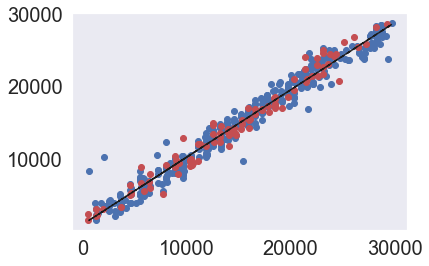

In [39]:
# param_grid = {
#     'booster': 'gbtree',
#     'max_depth':6,
#     'learning_rate':0.055,
#     'min_child_weight':6, 
#     'gamma':0.11,
#     'subsample':0.52,
#     'colsample_bytree':0.71,
#     'reg_alpha':0.3
#   #  'objective':['reg:gamma']

# }
# X = df[selected_features]
# y = df[target]
# dmatrix = xgb.DMatrix(X.values,
#                      y.values,
#                      feature_names = X.columns.values)
# estimator = xgb.cv(param_grid, dmatrix, num_boost_round=1000, nfold=5, metrics ='mae', early_stopping_rounds= 20,shuffle=True)
# print(estimator)
# estimator.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],eval_metric = 'mae',early_stopping_rounds=20)
# evals_result = estimator.evals_result()
y_pred0 = best.predict(X_train)
y_pred = best.predict(X_test)
#y_fake = gbm.predict(X_fake)



# Print Result and Output figure
print('Best parameters found by grid search are:', gbm.best_params_)
print('The rmse of train prediction is:', mean_squared_error(y_train, y_pred0) ** 0.5)
print('The rmse of test prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)
print('The MAE of train prediction is:', mean_absolute_error(y_train, y_pred0))
print('The MAE of test prediction is:', mean_absolute_error(y_test, y_pred))
x1 = np.array(y_train)
x2 = np.array(y_test)
y1 = np.array(y_pred0)
y2 = np.array(y_pred)
plt.plot(x1, y1,'bo', x2, y2, 'ro')
z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x1,p(x1),"k--")
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.grid(False)
print(r2_score(y_train, y_pred0))

# XGBoost Feature importance(just for comparison)

In [53]:
from xgboost import plot_importance
# param_grid = {
#     'booster': 'gbtree',
#     'max_depth':6,
#     'learning_rate':0.055,
#     'min_child_weight':6, 
#     'gamma':0.11,
#     'subsample':0.52,
#     'colsample_bytree':0.71,
#     'reg_alpha':0.3
#   #  'objective':['reg:gamma']

# }
# estimator = xgb.XGBRegressor(**param_grid)
#best.fit(X_train, y_train)

print(len(best.feature_importances_))
selected_features = [
                      u'nega_1', u'nega_2', u'nega_3',  u'nega_4', u'nega_5', u'nega_6',u'nega_7',u'nega_8',
                      u'aff_1', u'aff_2', u'aff_3',   u'aff_4',  u'aff_5',  u'aff_6', u'aff_7', u'aff_8',
                     u'val_1',  u'val_2',  u'val_3', u'val_4', u'val_5',  u'val_6', u'val_7', u'val_8', 
                     u'ioni1_1', u'ioni1_2',   u'ioni1_3', u'ioni1_4',  u'ioni1_5', u'ioni1_6',u'ioni1_7',u'ioni1_8', 
                      u'ioni2_1', u'ioni2_2',  u'ioni2_3', u'ioni2_4',  u'ioni2_5', u'ioni2_6',u'ioni2_7',u'ioni2_8' , 
                      u'radius_1', u'radius_2',   u'radius_3', u'radius_4',  u'radius_5', u'radius_6',u'radius_7',u'radius_8',
                     u'redox_1', u'redox_2', u'redox_3', u'redox_4',  u'redox_5', u'redox_6',u'redox_7',u'redox_8',
                     u'TC_1',u'TC_2', u'TC_3', u'TC_4',  u'TC_5', u'TC_6',u'TC_7',u'TC_8',
                     u'HF_1',u'HF_2', u'HF_3', u'HF_4',  u'HF_5', u'HF_6',u'HF_7',u'HF_8',
                     u'resis_1',u'resis_2', u'resis_3', u'resis_4',  u'resis_5', u'resis_6',u'resis_7',u'resis_8', 
                     u'iradius_1',u'iradius_2', u'iradius_3', u'iradius_4',  u'iradius_5', u'iradius_6',u'iradius_7',u'iradius_8', 
                    u'oxir_1',u'oxir_2', u'oxir_3', u'oxir_4',  u'oxir_5', u'oxir_6',u'oxir_7',u'oxir_8',
                     u'hyden_1',u'hyden_2', u'hyden_3', u'hyden_4',  u'hyden_5', u'hyden_6',u'hyden_7',u'hyden_8',
                    u'ioni3_1',u'ioni3_2', u'ioni3_3', u'ioni3_4',  u'ioni3_5', u'ioni3_6',u'ioni3_7',u'ioni3_8',
                      u'ioni4_1',u'ioni4_2', u'ioni4_3', u'ioni4_4', u'ioni4_5', u'ioni4_6',u'ioni4_7',u'ioni4_8',
                       u'ioni5_1',u'ioni5_2', u'ioni5_3', u'ioni5_4',  u'ioni5_5', u'ioni5_6',u'ioni5_7',u'ioni5_8',
                    u'EC_1',u'EC_2', u'EC_3', u'EC_4',  u'EC_5', u'EC_6',u'EC_7',u'EC_8', 
                     u'NC_1',u'NC_2', u'NC_3', u'NC_4',  u'NC_5', u'NC_6',u'NC_7',u'NC_8',
                     u'NM_1',u'NM_2', u'NM_3', u'NM_4',  u'NM_5', u'NM_6',u'NM_7',u'NM_8', 
                    u'SH_1',u'SH_2', u'SH_3', u'SH_4',  u'SH_5', u'SH_6',u'SH_7',u'SH_8',
                 u'LCx_1',u'LCx_2', u'LCx_3', u'LCx_4',  u'LCx_5', u'LCx_6',u'LCx_7',u'LCx_8',
                     u'LCz_1',u'LCz_2', u'LCz_3', u'LCz_4',  u'LCz_5', u'LCz_6',u'LCz_7',u'LCz_8'
]

importance=[]
names=[]
for i in range(176):
    if best.feature_importances_[i]>0.005:
        importance.append(best.feature_importances_[i])
        names.append(selected_features[i])

print(importance)
print(names)
print(len(names))

# Searching for outliers
# for i in range(len(y_test)):
#     if y_test[i] > 3.8 and y_test[i] < 4:
#         if y_pred[i]>1.5 and y_pred[i]<2.:
#             list_p =[y_test[i], y_pred[i]]
#             print(str(list_p))

176
[0.0088495575, 0.0074880873, 0.0061266166, 0.012933969, 0.009530293, 0.0061266166, 0.0088495575, 0.008168822, 0.012253233, 0.011572498, 0.0054458817, 0.0054458817, 0.0061266166, 0.0054458817, 0.006807352, 0.0061266166, 0.006807352, 0.008168822, 0.0061266166, 0.008168822, 0.0054458817, 0.006807352, 0.011572498, 0.0054458817, 0.0054458817, 0.0054458817, 0.0074880873, 0.0074880873, 0.0054458817, 0.006807352, 0.006807352, 0.0061266166, 0.0074880873, 0.008168822, 0.0074880873, 0.0054458817, 0.0074880873, 0.0074880873, 0.006807352, 0.010211028, 0.0054458817, 0.009530293, 0.0088495575, 0.009530293, 0.009530293, 0.006807352, 0.008168822, 0.006807352, 0.0061266166, 0.0054458817, 0.0061266166, 0.0061266166, 0.0054458817, 0.0054458817, 0.011572498, 0.009530293, 0.006807352, 0.0054458817, 0.0074880873, 0.012253233, 0.0054458817, 0.009530293, 0.0054458817, 0.014295439, 0.006807352, 0.008168822, 0.006807352, 0.010211028, 0.006807352, 0.006807352, 0.0061266166, 0.016337644, 0.013614704, 0.0061266

# Generated Structures and their predicted saturation magnetization distribution

In [54]:
df1 = pd.read_csv('Fe_Ni_feature.csv')
df2 = pd.read_csv('Fe_Zn_feature.csv')
df3 = pd.read_csv('Fe_Co_feature.csv')
df4 = pd.read_csv('Fe_Cu_feature.csv')
df5 = pd.read_csv('Fe_Mn_feature.csv')
# Ni generate 
X_Ni = df1[selected_features].values
#X_Ni = min_max_scaler.fit_transform(X_Ni)
#X_Ni = selector.transform(X_Ni)
y_Ni = best.predict(X_Ni)
y_Ni = np.power(y_Ni,1.3)/100000

# Zn generate 
X_Zn = df2[selected_features].values
#X_Zn = min_max_scaler.fit_transform(X_Zn)
#X_Zn = selector.transform(X_Zn)
y_Zn = best.predict(X_Zn)
y_Zn = np.power(y_Zn,1.3)/100000
# Co generate 
X_Co = df3[selected_features].values
#X_Co = min_max_scaler.fit_transform(X_Co)
#X_Co = selector.transform(X_Co)
y_Co = best.predict(X_Co)
y_Co = np.power(y_Co,1.3)/100000
# Cu generate
X_Cu = df4[selected_features].values
#X_Cu = min_max_scaler.fit_transform(X_Cu)
#X_Cu = selector.transform(X_Cu)
y_Cu = best.predict(X_Cu)
y_Cu = np.power(y_Cu,1.3)/100000
# Mn generate
X_Mn = df5[selected_features].values
#X_Mn = min_max_scaler.fit_transform(X_Mn)
#X_Mn = selector.transform(X_Mn)
y_Mn = best.predict(X_Mn)
y_Mn = np.power(y_Mn,1.3)/100000
print(y_Mn)

[4.60070188 5.0709925  4.33874188 5.62685875 4.98832906 5.40871
 5.45405438 6.17247438 5.5296075  5.58255062 4.70235656 5.06716719
 4.48644    4.59640313 5.38698875 5.733785   4.44079781 6.36591062
 4.97428125 6.037935   5.36108062 4.92188    4.47402687 5.74557438
 4.93139125 5.46581687 4.64664844 6.0667675  5.03654969 3.74219344
 4.7728625  4.29271906 5.91086    5.2575675  4.66736188 4.51036656
 4.92991875 4.37794656 5.14183937 4.73195062 5.99432625 5.27596062
 5.9942275  5.99242313 5.05362594 5.88346312 6.370025   5.62574937
 5.15877688 5.744455   5.92576937 4.62618156 5.5680075  5.5265575
 5.22763719 6.01925625 4.35200813 5.08063406 5.334065   5.4786275
 6.12735438 5.13627812 5.35519188 5.25975687 4.87707312 5.83484
 5.1233375  4.70544406 5.1130025  5.14514    5.96268375 4.35590219
 5.13628813 4.92328656 5.06741688 5.03715344 4.47647187 4.53959687
 4.97343719 4.8517325  4.82035625 5.43080813 5.44159438 5.76391813
 4.88908312 5.29844813 5.35115375 4.83210531 5.22492219 5.14514469
 6.

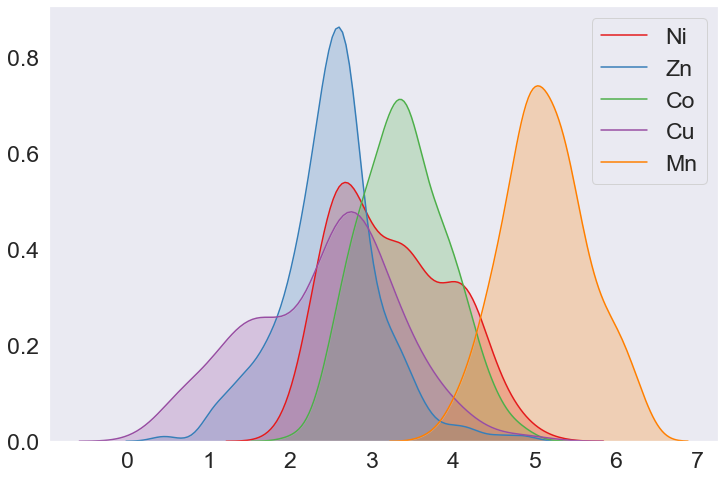

In [55]:
import seaborn as sns

f, ax1 = plt.subplots(sharex=True, figsize=(12, 8))
c1, c2, c3, c4,c5 = sns.color_palette('Set1', 5)

sns.set(font_scale=2.1)  
sns.kdeplot(y_Ni, shade=True, color=c1,label='Ni', ax=ax1)
sns.kdeplot(y_Zn, shade=True, color=c2, label='Zn', ax=ax1)
sns.kdeplot(y_Co, shade=True, color=c3, label='Co', ax=ax1)
sns.kdeplot(y_Cu, shade=True, color=c4, label='Cu', ax=ax1)
sns.kdeplot(y_Mn, shade=True, color=c5, label='Mn', ax=ax1)
plt.grid(False)
plt.savefig('distribution.png')


# $Fe_{2.5}Mn_{0.5}O_4$ distribution based on the xgboost predicted values

6.365910625


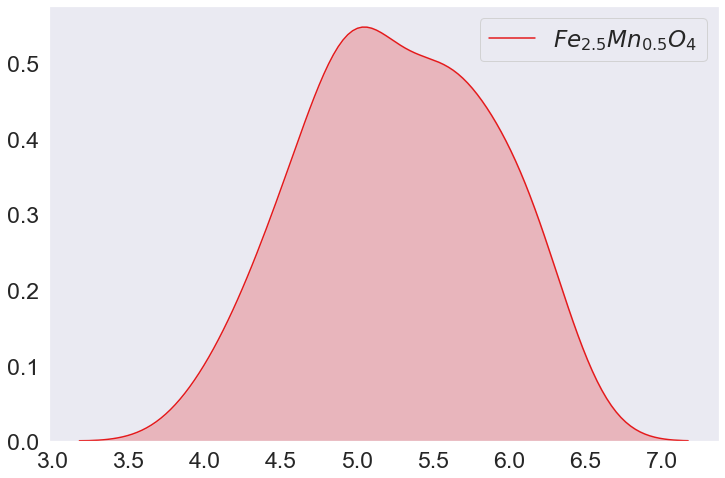

In [59]:
df6 = pd.read_csv('Fe_Mn_feature_new.csv')
df7 = pd.read_csv('Fe_Cu_feature_new.csv')
df8 = pd.read_csv('Fe_Co_feature_new.csv')
df9 = pd.read_csv('Fe_Ni_feature_new.csv')
# Mn generate
X_Mn = df6[selected_features].values
#X_Mn = min_max_scaler.fit_transform(X_Mn)
#X_Mn = selector.transform(X_Mn)
y_Mn = best.predict(X_Mn)
y_Mn = np.power(y_Mn,1.3)/100000
print(np.amax(y_Mn))

# Cu generate
#X_Cu = df7[selected_features].values
#X_Mn = min_max_scaler.fit_transform(X_Mn)
#X_Mn = selector.transform(X_Mn)
#y_Cu = best.predict(X_Cu)


# Co generate
#X_Ni = df8[selected_features].values
#X_Mn = min_max_scaler.fit_transform(X_Mn)
#X_Mn = selector.transform(X_Mn)
#y_Ni = best.predict(X_Ni)

# Co generate
#X_Co = df9[selected_features].values
#X_Mn = min_max_scaler.fit_transform(X_Mn)
#X_Mn = selector.transform(X_Mn)
#y_Co = best.predict(X_Co)


f, ax1 = plt.subplots(sharex=True, figsize=(12, 8))
c1,c2,c3,c4 = sns.color_palette('Set1', 4)

sns.set(font_scale=2.1)  
sns.kdeplot(y_Mn, shade=True, color=c1, label='$Fe_{2.5}Mn_{0.5}O_4$', ax=ax1)
#sns.kdeplot(y_Cu, shade=True, color=c2,label='$Fe_{2.5}Cu_{0.5}O_4$', ax=ax1)
#sns.kdeplot(y_Co, shade=True, color=c3,label='$Fe_{2.5}Co_{0.5}O_4$', ax=ax1)
#sns.kdeplot(y_Ni, shade=True, color=c4,label='$Fe_{2.5}Ni_{0.5}O_4$', ax=ax1)
plt.grid(False)
plt.savefig('distribution_Mn.png')

In [60]:
# Average saturation magnetization of this particular composition
def Average(lst): 
    return sum(lst) / len(lst) 

# Average_Ni = Average(y_Ni)
# Average_Zn = Average(y_Zn)
# Average_Co = Average(y_Co)
# Average_Cu = Average(y_Cu)
Average_Mn = Average(y_Mn)

# print('Average of Ni:', Average_Ni)
# print('Average of Zn:', Average_Zn)
# print('Average of Co:', Average_Co)
# print('Average of Cu:', Average_Cu)
print('Average of Mn:', Average_Mn)

Average of Mn: 5.271121584821429


In [23]:
# Searching for outliers
# for i in range(len(y_test)):
#     if y_test[i] > 3 and y_test[i] < 3.3:
#         if y_pred[i]>1.5 and y_pred[i]<2.:
#             list_p =[y_test[i], y_pred[i]]
#             print(str(list_p))

In [24]:
# #print(y_fake)
# def Average(lst): 
#     return sum(lst) / len(lst) 
# number=[]
# for i in range(len(y_fake)):
#     if 2.6 <y_fake[i] < 3:
#         number.append(i)
# #print(len(number))        
# plt.hist(y_fake, bins=15, color='steelblue', normed=True )
# plt.savefig('Fe_Ni.png')
# print(Average(y_fake))
# #print(number)
# df2 = pd.read_csv('Fe_Ni.csv')
# # for item in number:
# #      print(np.array(df2.loc[item]))

# Neural Network(for comparison)

In [ ]:
from sklearn.neural_network import MLPRegressor

est = MLPRegressor(hidden_layer_sizes=(300,),
                                       activation='logistic',
                                       solver='lbfgs',
                                       learning_rate='adaptive',
                                       max_iter=10000,
                                       learning_rate_init=0.01,
                                       alpha=0.004)
est.fit(X_train, y_train)
y_predA0 = est.predict(X_train)
y_predA = est.predict(X_test)
print('The MAE of train prediction is:', mean_absolute_error(y_train, y_predA0))
print('The MAE of test prediction is:', mean_absolute_error(y_test, y_predA))
x1 = np.array(y_train)
x2 = np.array(y_test)
y1 = np.array(y_predA0)
y2 = np.array(y_predA)
plt.plot(x1, y1,'bo', x2, y2, 'ro')
z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x1,p(x1),"k--")

In [ ]:
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(alpha=1.0, coef0=1, degree=2, gamma=None, kernel='linear',
            kernel_params=None)
clf.fit(X_train, y_train)
y_predL0 = clf.predict(X_train)
y_predL = clf.predict(X_test)
print('The MAE of train prediction is:', mean_absolute_error(y_train, y_predL0))
print('The MAE of test prediction is:', mean_absolute_error(y_test, y_predL))

In [ ]:
# from pandas import read_csv
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

# # define base model
# def baseline_model():
# # create model
#     model = Sequential()
#         model.add(Dense(98, input_dim=98, kernel_initializer='normal', activation='relu'))
#         model.add(Dense(1, kernel_initializer='normal'))
#         # Compile model
#         model.compile(loss='mean_squared_error', optimizer='adam')
#         return model
# # evaluate model
# estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
# kfold = KFold(n_splits=10)
# results = cross_val_score(estimator, X_train, y_train, cv=kfold)
# print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))